In [249]:
import pandas as pd
import numpy as np
import missingno as msno
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
#Read in first file
user_info_df = pd.read_csv("takehome_users.csv", encoding='latin-1')
user_info_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [251]:
#Change column name to create primary key
user_info_df.rename(columns={'object_id':'user_id'}, inplace=True)

In [252]:
user_info_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [253]:
#Read in second file
user_summ_df = pd.read_csv("takehome_user_engagement.csv")
user_summ_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [254]:
#Merge the two files together on the "user id" column both dataframe has
user_df = pd.merge(user_info_df, user_summ_df, on='user_id', how='outer')

In [255]:
user_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1.0


In [256]:
user_df.dtypes

user_id                         int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
time_stamp                     object
visited                       float64
dtype: object

In [257]:
user_df.shape

(211094, 12)

In [258]:
#Casting to datatime object for splicing later
user_df['creation_time'] = pd.to_datetime(user_df['creation_time'])
user_df['time_stamp'] = pd.to_datetime(user_df['time_stamp'])

#Convert to string for encoding later
user_df['user_id'] = user_df['user_id'].astype('string')

In [259]:
user_df.dtypes

user_id                               string
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
time_stamp                    datetime64[ns]
visited                              float64
dtype: object

In [ ]:
#Lets check the first and last time stamp for creation time

In [260]:
user_df['creation_time'].min()

Timestamp('2012-05-31 00:43:27')

In [261]:
user_df['creation_time'].max()

Timestamp('2014-05-30 23:59:19')

<Axes: >

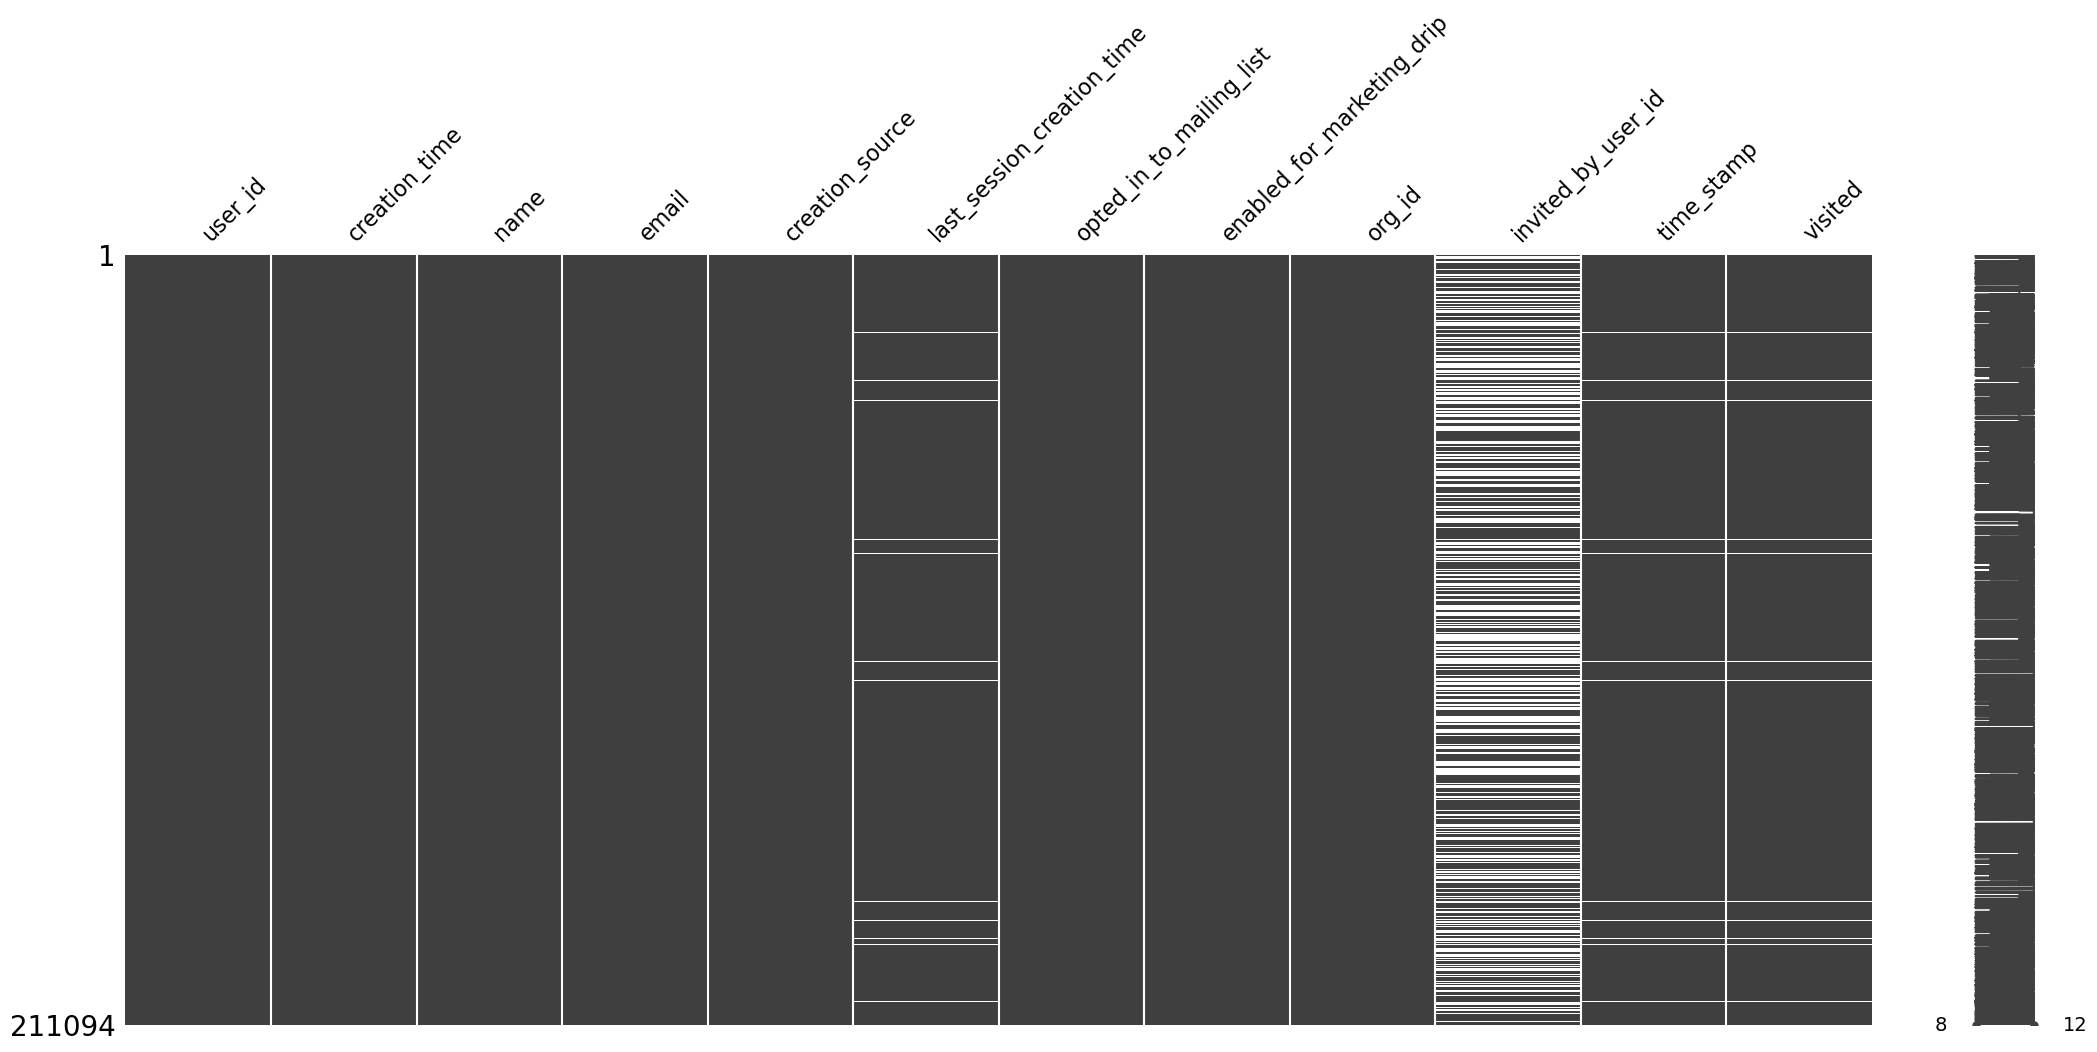

In [262]:
#Checking for any columns with missing data
msno.matrix(user_df)

In [263]:
#Impute with 0's since a user with the id '0' does not exist we can use it to represent missing
user_df['invited_by_user_id'] = user_df['invited_by_user_id'].fillna(0)
user_df['visited'] = user_df['visited'].fillna(0)
user_df['last_session_creation_time'] = user_df['last_session_creation_time'].fillna(0)

In [264]:
#Since we need the timestamp to calulate whether or not the user has visited, we will drop any rows with the data missing
user_df.dropna(inplace=True)

<Axes: >

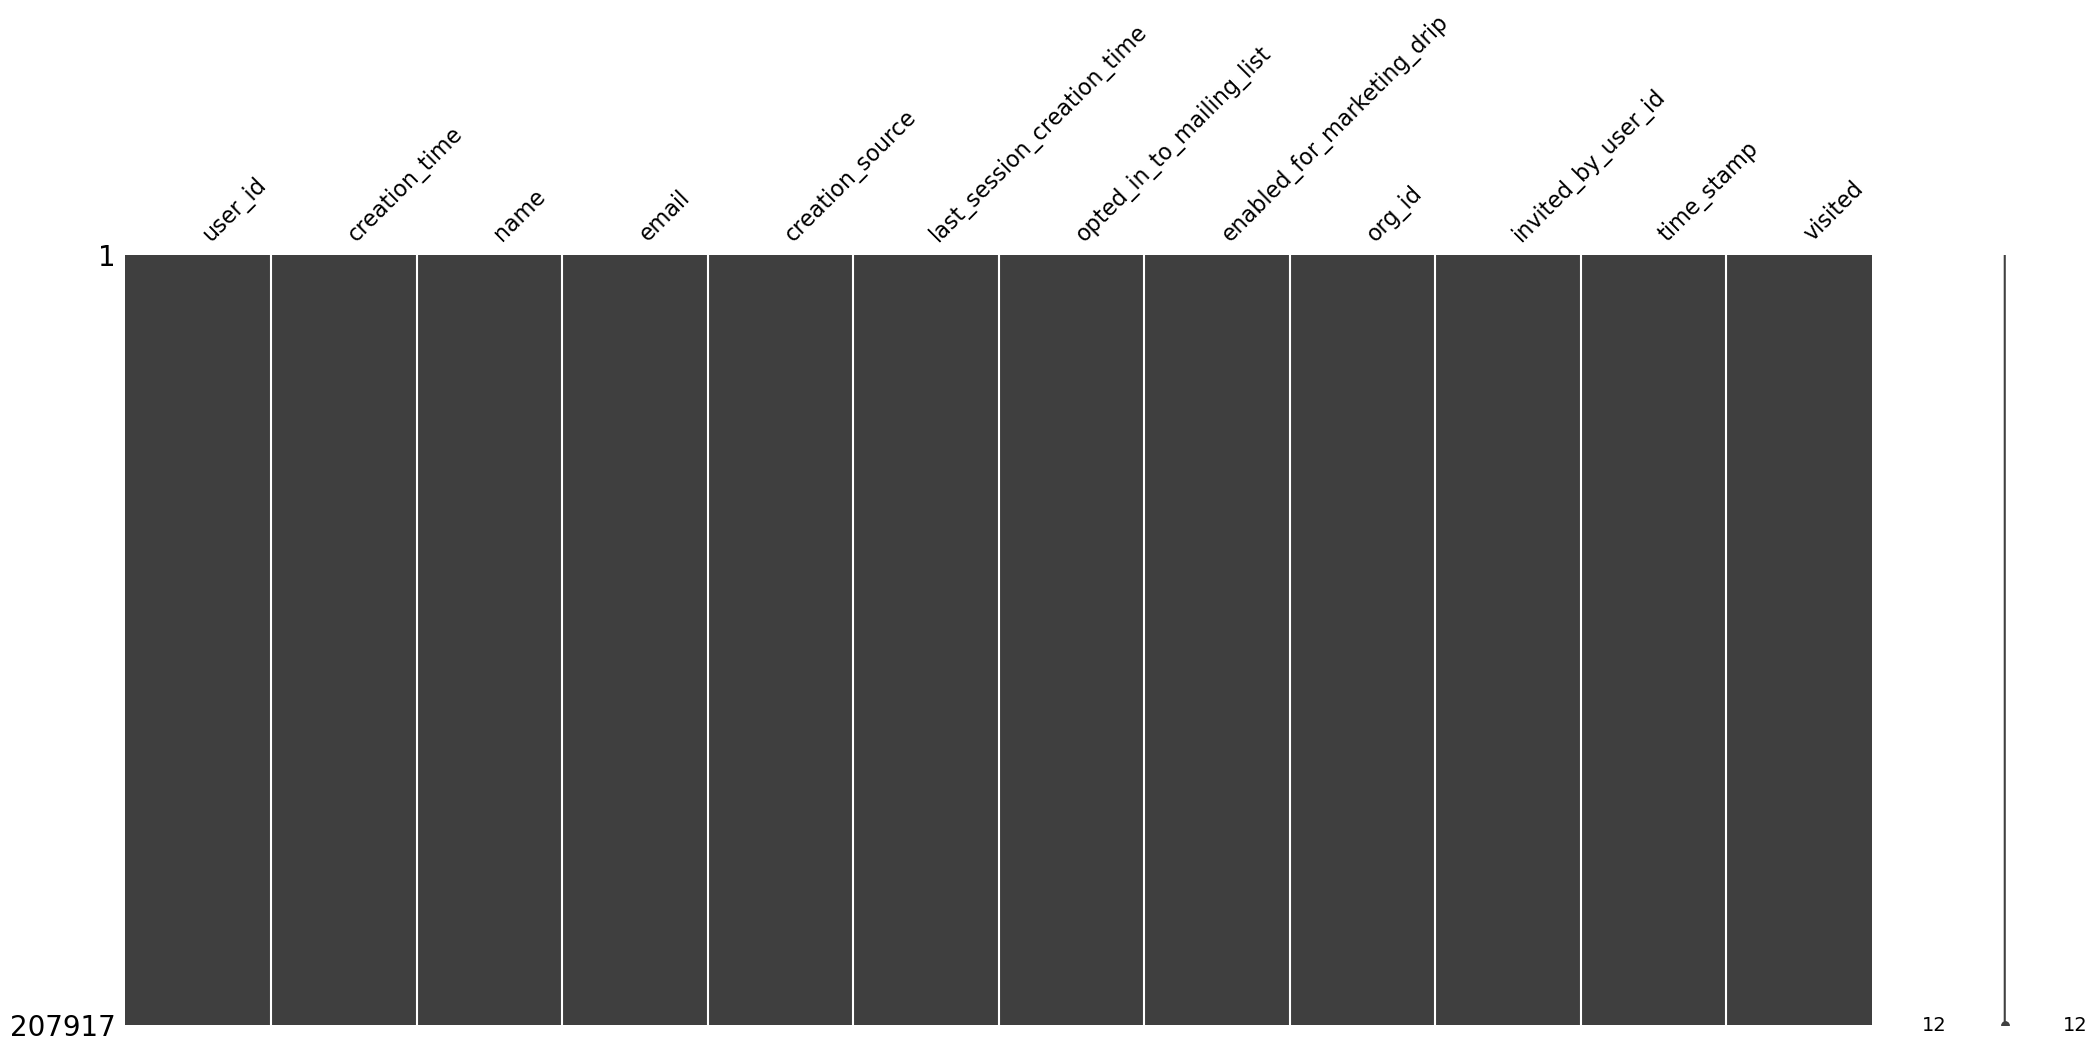

In [265]:
#Check again for any columns with missing data
msno.matrix(user_df)

In [301]:
#Checking the total number of visits for each user and create a column to store them
total_visit = user_df['user_id'].value_counts().reset_index()
total_visit.columns = ['user_id', 'total_visits']

In [267]:
total_visit

,user_id,total_visits
0,3623,606
1,906,600
2,1811,593
3,7590,590
4,8068,585
...,...,...
8818,9102,1
8819,9103,1
8820,9104,1
8821,9105,1


In [268]:
#Casting to to merge dataframes
total_visit['user_id'] = total_visit['user_id'].astype(object)
user_df['user_id'] = user_df['user_id'].astype(object)

In [269]:
total_visit.dtypes

user_id         object
total_visits     Int64
dtype: object

In [270]:
user_df.dtypes

user_id                               object
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
time_stamp                    datetime64[ns]
visited                              float64
dtype: object

In [271]:
user_df = user_df.merge(total_visit, on='user_id', how='left')

In [272]:
user_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,total_visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1.0,14
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1.0,14
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1.0,14
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1.0,14


In [273]:
user_df.shape

(207917, 13)

In [274]:
user_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,visited,total_visits
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,1.0,14
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,1.0,14
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,1.0,14
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,1.0,14


In [275]:
#Drop any duplicates we have in the dataframe
user_df = user_df.drop_duplicates()

In [276]:
user_df.shape

(207917, 13)

In [277]:
user_df['user_id'].value_counts()

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
4699       1
4698       1
4697       1
4696       1
12000      1
Name: user_id, Length: 8823, dtype: int64

In [278]:
user_df['time_stamp'].dtype

dtype('<M8[ns]')

In [279]:
#Create seperate columns for the time and date of the "login" and "creation" datetime objects
user_df['login_dates'] = user_df['time_stamp'].dt.date
user_df["login_times"] = user_df["time_stamp"].dt.time
user_df['creation_dates'] = user_df['creation_time'].dt.date
user_df['creation_times'] = user_df['creation_time'].dt.time

In [280]:
#Drop these columns since they're duplicate data now
user_df.drop(["time_stamp", "creation_time"], axis=1, inplace=True)

In [281]:
user_df.head()

,user_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,total_visits,login_dates,login_times,creation_dates,creation_times
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,1,2014-04-22,03:53:30,2014-04-22,03:53:30
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14,2013-11-15,03:45:04,2013-11-15,03:45:04
2,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14,2013-11-29,03:45:04,2013-11-15,03:45:04
3,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14,2013-12-09,03:45:04,2013-11-15,03:45:04
4,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14,2013-12-25,03:45:04,2013-11-15,03:45:04


In [282]:
#Convert to datetime 
user_df['login_dates'] = pd.to_datetime(user_df['login_dates'])
user_df['creation_dates'] = pd.to_datetime(user_df['creation_dates'])

In [283]:
user_df.dtypes

user_id                               object
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
visited                              float64
total_visits                           Int64
login_dates                   datetime64[ns]
login_times                           object
creation_dates                datetime64[ns]
creation_times                        object
dtype: object

In [284]:
user_df.head()

,user_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,total_visits,login_dates,login_times,creation_dates,creation_times
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,1,2014-04-22,03:53:30,2014-04-22,03:53:30
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14,2013-11-15,03:45:04,2013-11-15,03:45:04
2,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14,2013-11-29,03:45:04,2013-11-15,03:45:04
3,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14,2013-12-09,03:45:04,2013-11-15,03:45:04
4,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14,2013-12-25,03:45:04,2013-11-15,03:45:04


In [285]:
#Counting the number of logins during each 7 day period
def rolling(df):
    return df.rolling('7D', on='login_dates')['user_id'].count()

In [286]:
#Create a feature to count the number of logins during the span of days starting at the start of each login date
user_df['visits_7_days'] = user_df.groupby('user_id', group_keys=False).apply(rolling)

In [287]:
#Create a target feature, a user "is_adopted" if there are more than 3 logins in a 7 day period
#1 if "is_adopted", 0 if not
user_df['is_adopted'] = np.where((user_df['visits_7_days'] >= 3), 1, 0)

In [288]:
user_df.head()

,user_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,total_visits,login_dates,login_times,creation_dates,creation_times,visits_7_days,is_adopted
0,1,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0,1,2014-04-22,03:53:30,2014-04-22,03:53:30,1.0,0
1,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14,2013-11-15,03:45:04,2013-11-15,03:45:04,1.0,0
2,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14,2013-11-29,03:45:04,2013-11-15,03:45:04,1.0,0
3,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14,2013-12-09,03:45:04,2013-11-15,03:45:04,1.0,0
4,2,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,14,2013-12-25,03:45:04,2013-11-15,03:45:04,1.0,0


In [289]:
#Create a list of feature columns to encode
features = ["name", "email", "creation_source", "login_times", "creation_times", "login_dates", "creation_dates"]

In [302]:
#Using label encoder to convert categorical features to numerical representation
encoder = LabelEncoder()
for feature in features:
    user_df[feature] = encoder.fit_transform(user_df[feature])

In [291]:
user_df.head()

,user_id,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,total_visits,login_dates,login_times,creation_dates,creation_times,visits_7_days,is_adopted
0,1,1562,778,0,1.398139e+09,1,0,11,10803.0,1.0,1,691,1339,691,1339,1.0,0
1,2,6280,5439,1,1.396238e+09,0,0,1,316.0,1.0,14,533,1299,533,1299,1.0,0
2,2,6280,5439,1,1.396238e+09,0,0,1,316.0,1.0,14,547,1299,533,1299,1.0,0
3,2,6280,5439,1,1.396238e+09,0,0,1,316.0,1.0,14,557,1299,533,1299,1.0,0
4,2,6280,5439,1,1.396238e+09,0,0,1,316.0,1.0,14,573,1299,533,1299,1.0,0


In [292]:
user_df["user_id"] = user_df['user_id'].astype(str).astype(int)

In [293]:
user_df.dtypes

user_id                         int32
name                            int32
email                           int32
creation_source                 int32
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
visited                       float64
total_visits                    Int64
login_dates                     int64
login_times                     int32
creation_dates                  int64
creation_times                  int32
visits_7_days                 float64
is_adopted                      int32
dtype: object

In [294]:
#Splits dataset into independent and dependent variables
X = user_df.drop(["is_adopted"], axis=1)
y = user_df["is_adopted"]

# Extra Trees Classifier

In [295]:
#Initalized the ExtraTreesClassifer() and fit our X and y into the model
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

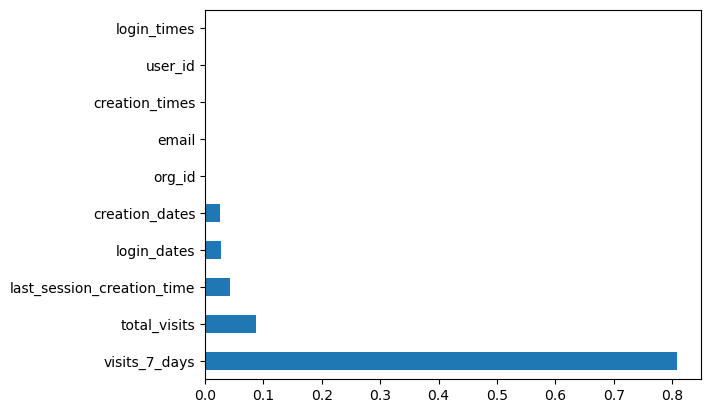

In [296]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

The ExtraTreesClassifier is a ensemble method similar to RandomForestClassifier; however, RandomForest uses the bootstrap method, whereas the ExtraTrees uses the entire original data sample. From the results, it looks like "visits_7_days" is the strongest feature predictor for the adopted user feature. The second strongest predictor is the "total_visits", followed by "last_session_creation_time".

# Heat Map

For the next step, we will create a heat map to generation a visualization of the correlation between each variable. Correlation values will be between values of -1 to 1, with values close to 1 have strong correlations, while values close to -1 will have negative correlations and values close to 0 having no correlations. In this case we will want features under the "is_adopted" column to have a postive correlation as they will be strong predictors. 

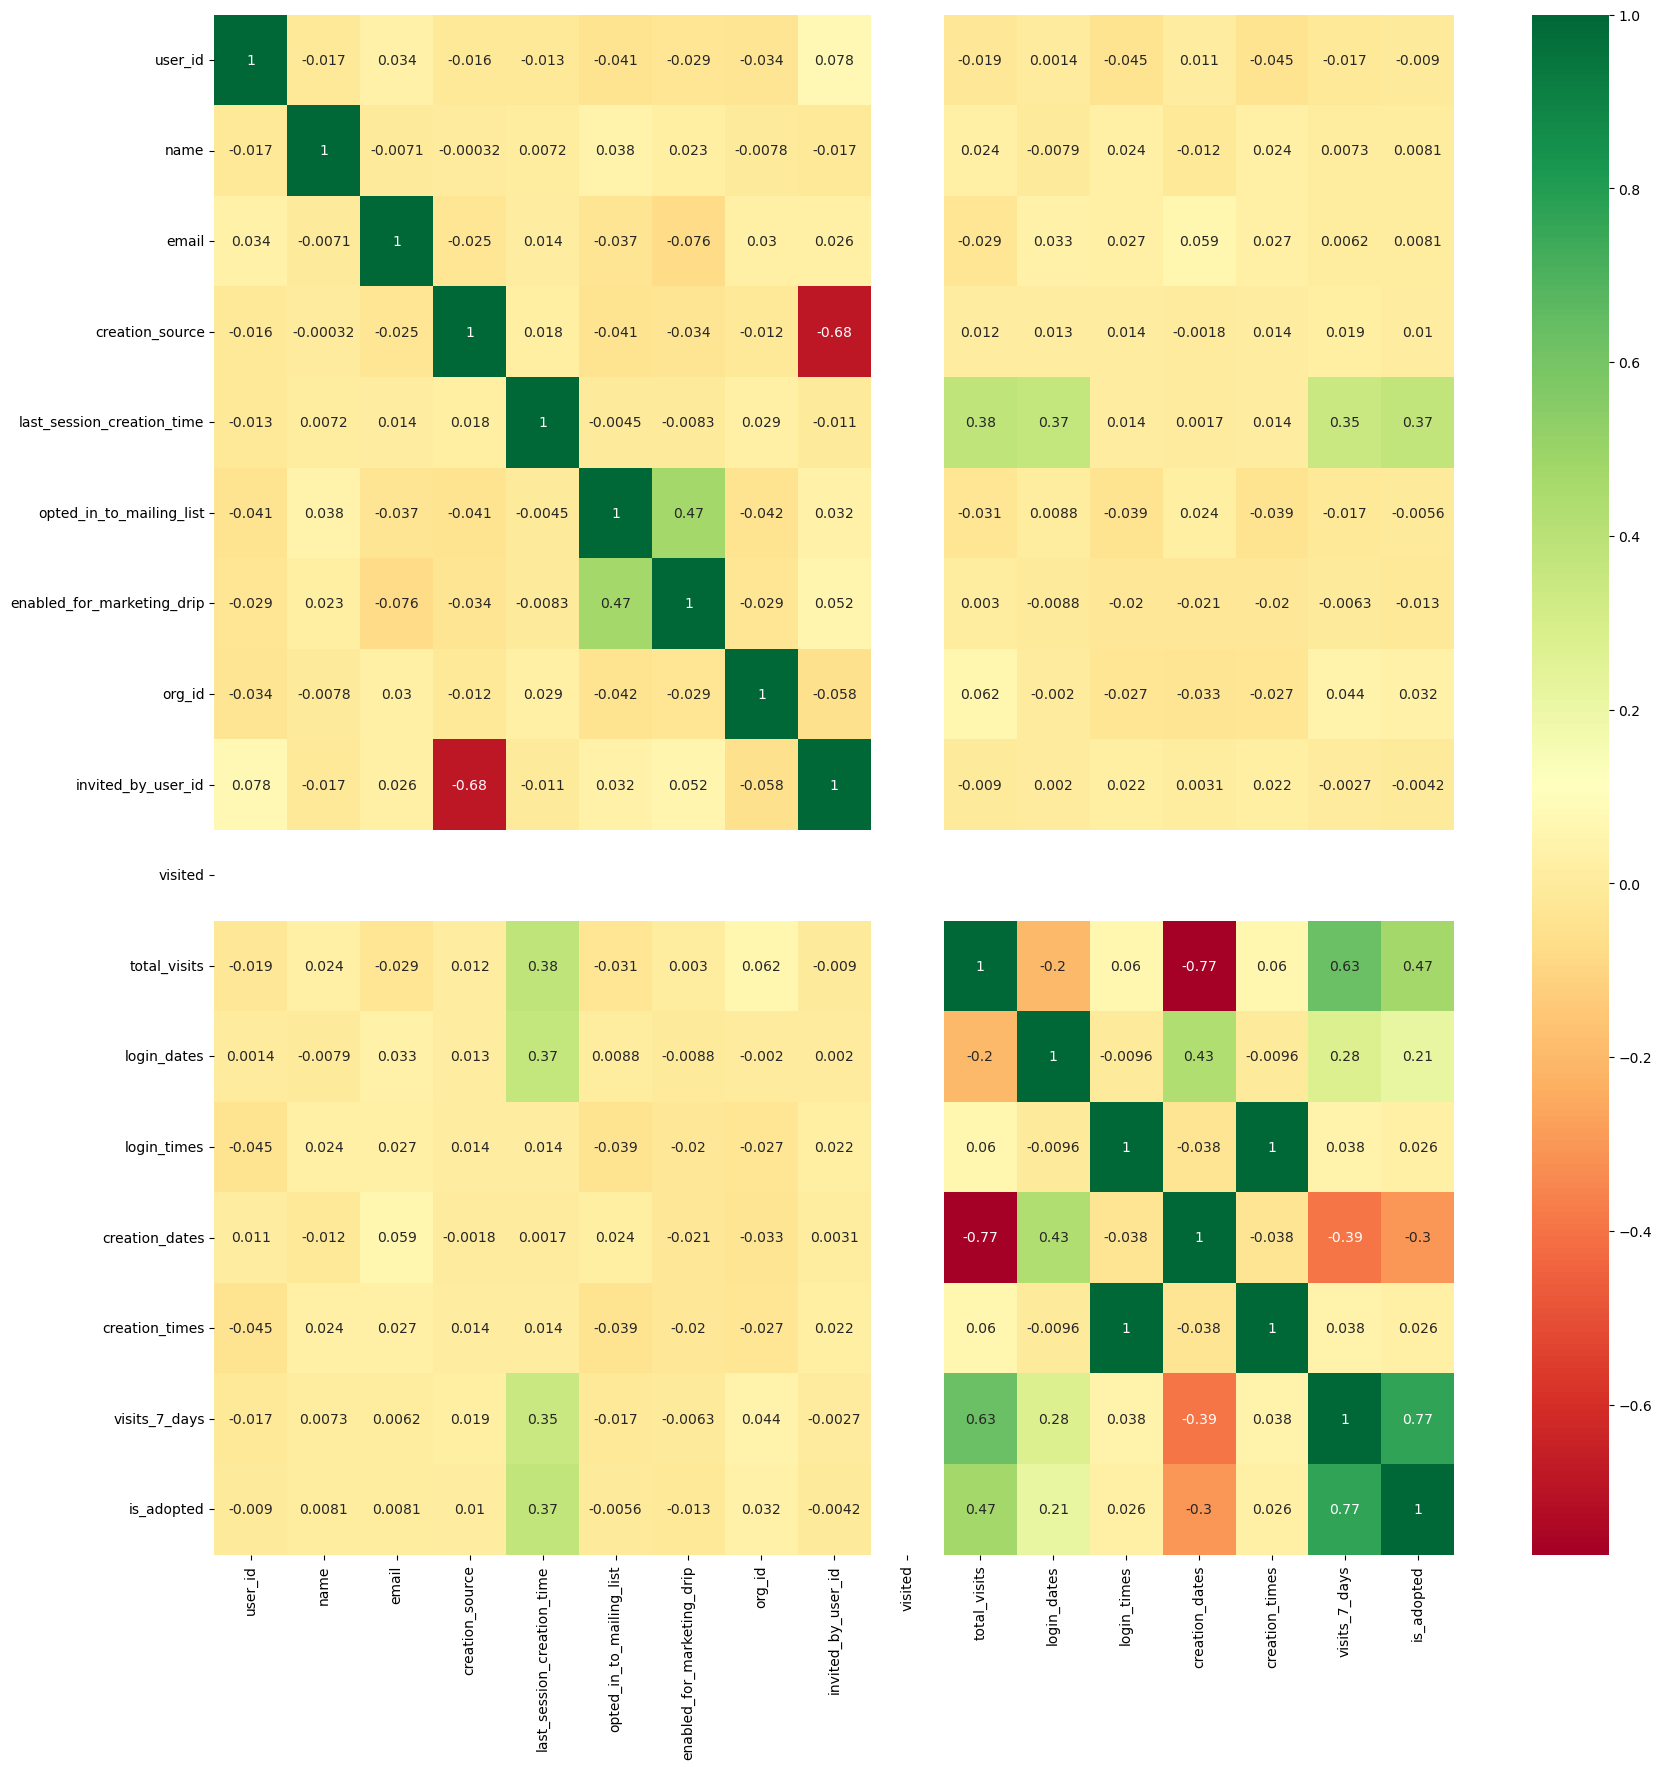

In [297]:
corrmat = user_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(user_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Here, see "visits_7_days" and "total_visits" as the two features with the highest correlation at 0.77 and 0.47 respectively. The "last_session_creation_time" is not far behind with a correlation of 0.37 and "login_dates" at 0.21. These results are quite similar to the ones we got from the extra trees classifier, and the results we got here confirmed our findings from the pervious step. 

# Random Forest

Lets create a random forest model and use the SelectFromModel library to select the most important features. As discussed before, RandomForest and ExtraTrees have a lot in common except RandomForst has bootstrap enabled by default so it will create more data by resampling the dataset. 

In [298]:
#Splits into training and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [299]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [300]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['total_visits', 'visits_7_days'], dtype='object')


Like the results from the feature importance library and heat map, it looks like the "total_visits" and "visits_7_days" were the features most important to predict feature user adoption. It makes sense why "visits_7_days" would be a strong feature as the "is_adopted" feature is dervived from it.